# Week 5: Final Project

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
#!pip3 install opencv-python
import cv2 as cv
import matplotlib.pyplot as plt
import os
import math
import time
import itertools
import random

from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## Step 1
**Gather data, determine the method of data collection and provenance of the data (3 points)**

In the earliest phase, select a data source and problem. Feel free to share and discuss your idea on the class discussion board.




Data: Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images

Link: https://data.mendeley.com/datasets/rscbjbr9sj/3

## Step 2
**Identify an Unsupervised Learning Problem (6 points)**

Model building and training may depend on their data type(s) and task type(s). When using multiple models, at least one of them should be an unsupervised approach. 

Unsupervised models: NMF, KMeans

## Step 3
**Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data (26 points).**

Go through the initial data cleaning and EDA and judge whether you need to collect more or different data.

**EDA Procedure Example:**
- Describe the factors or components that make up the dataset (The "factors" here are called "features" in the machine learning term. These factors are often columns in the tabulated data). For each factor, use a box-plot, scatter plot, histogram, etc., to describe the data distribution as appropriate.
- Describe correlations between different factors of the dataset and justify your assumption that they are correlated or not correlated. You may use numeric or qualitative/graphical analysis for this step.
- Determine if any data needs to be transformed. For example, if you're planning on using an SVM method for prediction, you may need to normalize or scale the data if there is a considerable difference in the range of data. 
- Using your hypothesis, indicate if it's likely that you should transform data, such as using a log transform or other transformation of the dataset.
- You should determine if your data has outliers or needs to be cleaned in any way. Are there missing data values for specific factors? How will you handle the data cleaning? Will your discard, interpolate or otherwise substitute data values?
- If you believe that specific factors will be more important than others in your analysis, you should mention which and why. You will use this to confirm your intuitions in your final write-up.


In [30]:
# Read the data
def read_xray_images(path, pix_value):
    first_image_path = path + "/" + os.listdir(path)[0]
    #print(first_image_path)
    first_image = cv.imread(first_image_path, 0)
    #print(first_image)
    
    data = cv.resize(first_image, (pix_value, pix_value))
    data = data.reshape(1, pix_value**2)
    #print(data.shape)
    
    for image in os.listdir(path):
        cur_path = path + '/' + image
        #print(cur_path)
        cur_pic = cv.imread(cur_path, 0)
        cur_pic = cv.resize(cur_pic, (pix_value, pix_value))
        cur_pic = cur_pic.reshape(1, pix_value**2)
        data = np.append(data, cur_pic, axis=0)
        
    return(data)

In [31]:
paths_l = ["./CellData/chest_xray/train/NORMAL",
           "./CellData/chest_xray/train/BACTERIAL",
           "./CellData/chest_xray/train/VIRAL",
           "./CellData/chest_xray/test/NORMAL",
           "./CellData/chest_xray/test/BACTERIAL",
           "./CellData/chest_xray/test/VIRAL",]

data = read_xray_images(paths_l[0], 100)
print(paths_l[0])
print(data.shape)
print()

for path in paths_l[1:]:
    print(path)
    cur_data = read_xray_images(path, 100)
    print(cur_data.shape)
    print()
    data = np.append(data, cur_data, axis=0)

./CellData/chest_xray/train/NORMAL
(1350, 10000)

./CellData/chest_xray/train/BACTERIAL
(2539, 10000)

./CellData/chest_xray/train/VIRAL
(1346, 10000)

./CellData/chest_xray/test/NORMAL
(235, 10000)

./CellData/chest_xray/test/BACTERIAL
(243, 10000)

./CellData/chest_xray/test/VIRAL
(149, 10000)



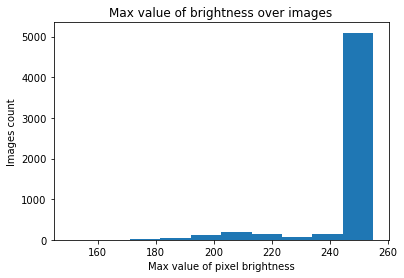

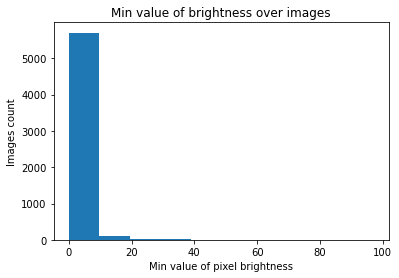

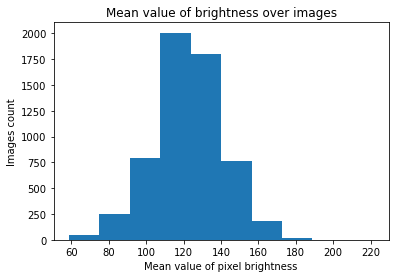

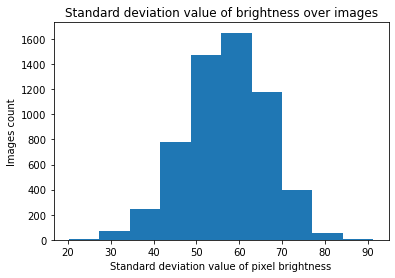

In [36]:
# Histogram of max values
max_l = list(np.max(data, axis=1))
plt.hist(max_l)
plt.xlabel("Max value of pixel brightness")
plt.ylabel("Images count")
plt.title("Max value of brightness over images")
plt.show()

# Histogram of min values
min_l = list(np.min(data, axis=1))
plt.hist(min_l)
plt.xlabel("Min value of pixel brightness")
plt.ylabel("Images count")
plt.title("Min value of brightness over images")
plt.show()

# Histogram of mean values
mean_l = np.mean(data, axis=1)
plt.hist(mean_l)
plt.xlabel("Mean value of pixel brightness")
plt.ylabel("Images count")
plt.title("Mean value of brightness over images")
plt.show()

# Histogram of standard deviation values
std = np.std(data, axis=1)
plt.hist(std)
plt.xlabel("Standard deviation value of pixel brightness")
plt.ylabel("Images count")
plt.title("Standard deviation value of brightness over images")
plt.show()

In [38]:
# Perform PCA to reduce data size
min_var = 0.98
pca = PCA(n_components=min_var, svd_solver="full")

data_pca_transformed = pca.fit_transform(data)

In [39]:
print(data_pca_transformed.shape)

# Save the transformed data to csv file
np.savetxt("data_pca_transformed.csv", data_pca_transformed, delimiter=",")

(5862, 1533)


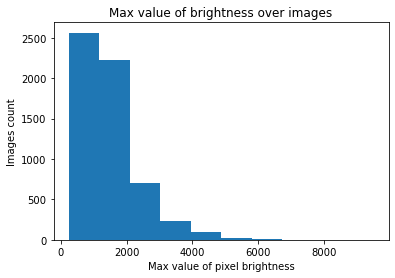

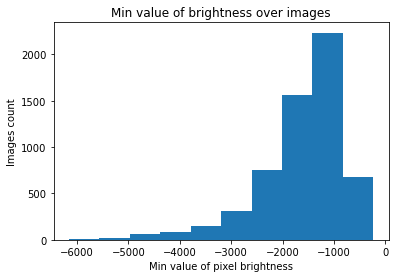

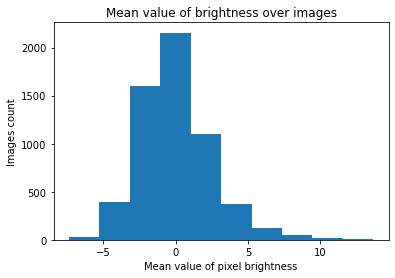

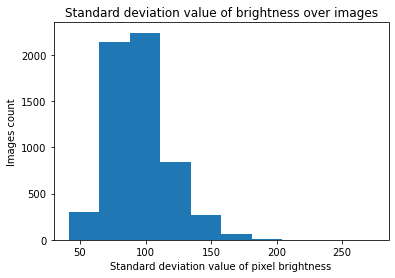

In [40]:
# Historgram of reduced data
# Histogram of max values
max_l = list(np.max(data_pca_transformed, axis=1))
plt.hist(max_l)
plt.xlabel("Max value of pixel brightness")
plt.ylabel("Images count")
plt.title("Max value of brightness over images")
plt.show()

# Histogram of min values
min_l = list(np.min(data_pca_transformed, axis=1))
plt.hist(min_l)
plt.xlabel("Min value of pixel brightness")
plt.ylabel("Images count")
plt.title("Min value of brightness over images")
plt.show()

# Histogram of mean values
mean_l = np.mean(data_pca_transformed, axis=1)
plt.hist(mean_l)
plt.xlabel("Mean value of pixel brightness")
plt.ylabel("Images count")
plt.title("Mean value of brightness over images")
plt.show()

# Histogram of standard deviation values
std = np.std(data_pca_transformed, axis=1)
plt.hist(std)
plt.xlabel("Standard deviation value of pixel brightness")
plt.ylabel("Images count")
plt.title("Standard deviation value of brightness over images")
plt.show()

## Step 4
**Perform Analysis Using Unsupervised Learning Models of your Choice, Present Discussion, and Conclusions (70 points)**

Model building and training may depend on their data type(s) and task type(s). Depending on your project, you may have one model or more. Generally, it is deemed a higher quality project if you **compare multiple models** and show your understanding of why specific models work better than the other or what limitations or cautions specific models may have. ***When using multiple models, at least one of them should be an unsupervised approach.***

For machine learning models, another recommendation is to show enough effort on the hyperparameter optimization.

If your project involves making a web app (not required), you can include the demo.


In [51]:
def predict(w_l):
    predictions_l = np.zeros(shape=(w_l.shape[0]))
    num_row = w_l.shape[0]
    num_col = w_l.shape[1]
    
    for i in range(num_row):
        cur_best = (None, 0)
        for j in range(num_col):
            if w_l[i, j] > cur_best[1]:
                cur_best = (j, w_l[i, j])
                
        predictions_l[i] = cur_best[0]
        
        
    return(predictions_l.astype(int))

In [42]:
def label_reconstruct(predictions_l, true_labels_l):
    num = predictions_l.shape[0]
    categories_l = list(np.unique(true_labels_l))
    permutations_l = list(itertools.permutations(categories_l))
    
    cur_best = (None, float("inf"))
    
    for per in permutations_l:
        mis_count = 0
        for i in range(num):
            if per[int(predictions_l[i])] != true_labels_l[i]:
                mis_count += 1
        if mis_count < cur_best[1]:
            cur_best = (per, mis_count)
            
    return(cur_best)

In [49]:
# Processing labels
normal_train_l = np.asarray(["NORMAL" for i in range(1350)])
viral_train_l = np.asarray(["VIRAL" for i in range(1346)])
bacterial_train_l = np.asarray(["BACTERIAL" for i in range(2539)])

normal_test_l = np.asarray(["NORMAL" for i in range(235)])
viral_test_l = np.asarray(["VIRAL" for i in range(149)])
bacterial_test_l = np.asarray(["BACTERIAL" for i in range(243)])

labels_l = np.append(normal_train_l, viral_train_l, axis=0)
labels_l = np.append(labels_l, bacterial_train_l, axis=0)
labels_l = np.append(labels_l, normal_test_l, axis=0)
labels_l = np.append(labels_l, viral_test_l, axis=0)
labels_l = np.append(labels_l, bacterial_test_l, axis=0)
print(labels_l.shape)



(5862,)


**NMF Model: L2 Loss**

In [ ]:
nmf_model_l2_3cat = NMF(n_components=3, beta_loss='frobenius', init='nndsvd', solver='cd', max_iter=1000)
w_l2_3cat = nmf_model_l2_3cat.fit_transform(data)

In [52]:
y_hat_l2_3cat = predict(w_l2_3cat)
category_names_l = label_reconstruct(y_hat_l2_3cat, labels_l)

int_labels_l = list()
label_dict = {category_names_l[0][0]: 0,
              category_names_l[0][1]: 1,
              category_names_l[0][2]: 2}

for label in labels_l:
    int_label = label_dict[label]
    int_labels_l.append(int_label)
    
int_labels_l = np.asarray(int_labels_l)

In [53]:
# Confusion matrix, accuracy, precision, recall
print(confusion_matrix(y_true=int_labels_l, y_pred=y_hat_l2_3cat))
print("Accuracy: ", accuracy_score(y_true=int_labels_l, y_pred=y_hat_l2_3cat))
print("Average precision: ", precision_score(y_true=int_labels_l, y_pred=y_hat_l2_3cat, average="weighted"))
print("Average recall: ", recall_score(y_true=int_labels_l, y_pred=y_hat_l2_3cat, average="weighted"))

[[1983   92  707]
 [1128  350  107]
 [ 948   28  519]]
Accuracy:  0.48652337086318664
Average precision:  0.5325013237300963
Average recall:  0.48652337086318664


**NMF Model: KL Loss**

In [ ]:
nmf_model_klloss_3cat = NMF(n_components=3, beta_loss='kullback-leibler', init='nndsvdar', solver='mu', max_iter=100)
w_klloss_3cat = nmf_model_klloss_3cat.fit_transform(data)

In [55]:
y_hat_klloss_3cat = predict(w_klloss_3cat)
category_names_l = label_reconstruct(y_hat_klloss_3cat, labels_l)

int_labels_l = list()
label_dict = {category_names_l[0][0]: 0,
              category_names_l[0][1]: 1,
              category_names_l[0][2]: 2,}

for label in labels_l:
    int_label = label_dict[label],
    int_labels_l.append(int_label)
    
int_labels_l = np.asarray(int_labels_l)

In [56]:
# Confusion matrix, accuracy, precision, recall
print(confusion_matrix(y_true=int_labels_l, y_pred=y_hat_klloss_3cat))
print("Accuracy: ", accuracy_score(y_true=int_labels_l, y_pred=y_hat_klloss_3cat))
print("Average precision: ", precision_score(y_true=int_labels_l, y_pred=y_hat_klloss_3cat, average="weighted"))
print("Average recall: ", recall_score(y_true=int_labels_l, y_pred=y_hat_klloss_3cat, average="weighted"))

[[2688    4   90]
 [1563   14    8]
 [1414    0   81]]
Accuracy:  0.4747526441487547
Average precision:  0.5508912123042436
Average recall:  0.4747526441487547


**KMeans: Lloyd**

In [ ]:
kmean_model_lloyd = KMeans(n_clusters=3, random_state=42, max_iter=100, algorithm='full').fit_transform(data_pca_transformed)


In [58]:
y_hat_lloyd = predict(kmean_model_lloyd)
category_names_l = label_reconstruct(y_hat_lloyd, labels_l)

int_labels_l = list()
label_dict = {category_names_l[0][0]: 0,
              category_names_l[0][1]: 1,
              category_names_l[0][2]: 2,}

for label in labels_l:
    int_label = label_dict[label],
    int_labels_l.append(int_label)
    
int_labels_l = np.asarray(int_labels_l)

In [60]:
# Confusion matrix, accuracy, precision, recall
print(confusion_matrix(y_true=int_labels_l, y_pred=y_hat_lloyd))
print("Accuracy: ", accuracy_score(y_true=int_labels_l, y_pred=y_hat_lloyd))
print("Average precision: ", precision_score(y_true=int_labels_l, y_pred=y_hat_lloyd, average="weighted"))
print("Average recall: ", recall_score(y_true=int_labels_l, y_pred=y_hat_lloyd, average="weighted"))

[[  17  674  804]
 [   5  900  680]
 [  28 1430 1324]]
Accuracy:  0.38229273285568066
Average precision:  0.39148884083051244
Average recall:  0.38229273285568066


**KMeans: Elkan**

In [ ]:
elkan_model = KMeans(n_clusters=3, random_state=42, max_iter=1000, algorithm='elkan').fit_transform(data_pca_transformed)

In [62]:
y_hat_elkan = predict(elkan_model)
category_names_l = label_reconstruct(y_hat_elkan, labels_l)

int_labels_l = list()
label_dict = {category_names_l[0][0]: 0,
              category_names_l[0][1]: 1,
              category_names_l[0][2]: 2,}

for label in labels_l:
    int_label = label_dict[label],
    int_labels_l.append(int_label)
    
int_labels_l = np.asarray(int_labels_l)

In [63]:
# Confusion matrix, accuracy, precision, recall
print(confusion_matrix(y_true=int_labels_l, y_pred=y_hat_elkan))
print("Accuracy: ", accuracy_score(y_true=int_labels_l, y_pred=y_hat_elkan))
print("Average precision: ", precision_score(y_true=int_labels_l, y_pred=y_hat_elkan, average="weighted"))
print("Average recall: ", recall_score(y_true=int_labels_l, y_pred=y_hat_elkan, average="weighted"))

[[  17  674  804]
 [   5  900  680]
 [  28 1430 1324]]
Accuracy:  0.38229273285568066
Average precision:  0.39148884083051244
Average recall:  0.38229273285568066


**Supervised Learning Model: Random Forest**

In [66]:
num_train = int(len(labels_l)* 0.8)
print(num_train)
random_forest_model = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=14).fit(data_pca_transformed[:num_train, :], labels_l[:num_train])
y_hat_random_forest = random_forest_model.predict(data_pca_transformed[num_train:, :])

4689


In [73]:

# Confusion matrix, accuracy, precision, recall
print(confusion_matrix(y_true=labels_l[num_train:], y_pred=y_hat_random_forest))
print("Accuracy: ", accuracy_score(y_true=labels_l[num_train:], y_pred=y_hat_random_forest))
print("Average precision: ", precision_score(y_true=labels_l[num_train:], y_pred=y_hat_random_forest, average="weighted"))
print("Average recall: ", recall_score(y_true=labels_l[num_train:], y_pred=y_hat_random_forest, average="weighted"))

[[696  93   0]
 [ 83 152   0]
 [141   8   0]]
Accuracy:  0.7229326513213982
Average precision:  0.6292254244884068
Average recall:  0.7229326513213982


### Discussion

Overall, supervised learning has better performance than unsupervised learning. 